In [86]:
# https://chroniclesofai.com/transfer-learning-with-keras-resnet-50/

import keras
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import PIL
import time
import tensorflow as tf
from keras.layers.core import Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [87]:
import pathlib

dataset_url = "/content/drive/MyDrive/CMPE-295-A/apple_dataset_normal_and_defected_with_extra_data_for_resnet_only_validation_data"

data_dir = pathlib.Path(dataset_url)

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/CMPE-295-A/apple_dataset_normal_and_defected_with_extra_data_for_resnet_only_validation_data/defected_apples/damaged_apple (144).jpg


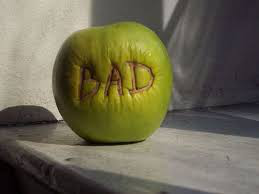

In [89]:
da = list(data_dir.glob('defected_apples/*'))
print(da[112])
PIL.Image.open(str(da[112]))

In [90]:
# Splitting the dataset

# Splitting the ds into training data and resizing it to 224 * 224 to make it uniform.
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1215 files belonging to 2 classes.
Using 972 files for training.


In [91]:
# Splitting the ds into validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1215 files belonging to 2 classes.
Using 243 files for validation.


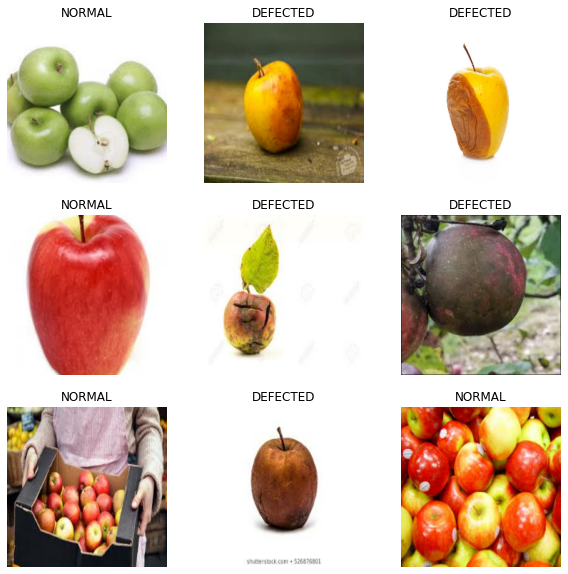

In [92]:
import matplotlib.pyplot as plt
classnames =['DEFECTED', 'NORMAL']

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.axis("off")


In [93]:
# Importing EfficientNetB4

EfficientNetB4_model = Sequential()

pretrained_model = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=2,
    classifier_activation="softmax")


for layer in pretrained_model.layers:
        layer.trainable=False

In [94]:
# # Importing pre trained model

# resnet_model.add(pretrained_model)
# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(2, activation='softmax'))

In [95]:
# Importing pre trained model

EfficientNetB4_model.add(pretrained_model)
EfficientNetB4_model.add(Flatten())
EfficientNetB4_model.add(Dense(512, activation='relu'))
EfficientNetB4_model.add(Dense(2, activation='softmax'))

In [96]:
# Model Summary

EfficientNetB4_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 flatten_2 (Flatten)         (None, 1792)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               918016    
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 18,592,865
Trainable params: 919,042
Non-trainable params: 17,673,823
_________________________________________________________________


In [97]:
# Training

EfficientNetB4_model.compile(optimizer=Adam(learning_rate=0.000005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [98]:
epochs=500

history = EfficientNetB4_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/500
31/31 [==============================] - 20s 242ms/step - loss: 0.6482 - accuracy: 0.6286 - val_loss: 0.6225 - val_accuracy: 0.6749
Epoch 2/500
31/31 [==============================] - 5s 158ms/step - loss: 0.6163 - accuracy: 0.6718 - val_loss: 0.5977 - val_accuracy: 0.6955
Epoch 3/500
31/31 [==============================] - 5s 158ms/step - loss: 0.5902 - accuracy: 0.6986 - val_loss: 0.5761 - val_accuracy: 0.7119
Epoch 4/500
31/31 [==============================] - 5s 157ms/step - loss: 0.5720 - accuracy: 0.7243 - val_loss: 0.5568 - val_accuracy: 0.7531
Epoch 5/500
31/31 [==============================] - 5s 157ms/step - loss: 0.5553 - accuracy: 0.7346 - val_loss: 0.5393 - val_accuracy: 0.7695
Epoch 6/500
31/31 [==============================] - 7s 198ms/step - loss: 0.5360 - accuracy: 0.7593 - val_loss: 0.5242 - val_accuracy: 0.7901
Epoch 7/500
31/31 [==============================] - 5s 158ms/step - loss: 0.5203 - accuracy: 0.7613 - val_loss: 0.5093 - val_accuracy: 0.794

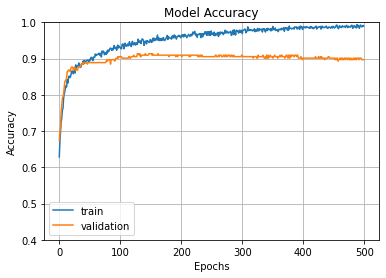

In [99]:
  # Model Evaluation

  fig1 = plt.gcf()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.axis(ymin=0.4,ymax=1)
  plt.grid()
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'])
  plt.show()

In [ ]:
EfficientNetB4_model.save("/content/drive/MyDrive/CMPE-295-A/my_EfficientNetB4_model_1")

# After trainig model once, only run cells below this cell 

In [ ]:
EfficientNetB4_model = keras.models.load_model("/content/drive/MyDrive/CMPE-295-A/my_EfficientNetB4_model_1")

In [120]:
EfficientNetB4_model.evaluate(val_ds)

8/8 [==============================] - 1s 102ms/step - loss: 0.2811 - accuracy: 0.8971


[0.2810652554035187, 0.8971193432807922]

In [123]:
predictions = np.array([])
labels =  np.array([])
for x, y in val_ds:
  predicted_categories = np.argmax(EfficientNetB4_model.predict(x), axis = 1)
  predictions = np.concatenate([predictions, predicted_categories])
  labels = np.concatenate([labels, y.numpy()], axis=0)

tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

array([[141,  16],
       [  9,  77]], dtype=int32)

In [124]:
print(classification_report(labels, predictions, target_names=classnames))

              precision    recall  f1-score   support

    DEFECTED       0.94      0.90      0.92       157
      NORMAL       0.83      0.90      0.86        86

    accuracy                           0.90       243
   macro avg       0.88      0.90      0.89       243
weighted avg       0.90      0.90      0.90       243



In [106]:
# Model Inference

import cv2
da = list(data_dir.glob('defected_apples/*'))

for ele in da:
  image=cv2.imread(str(ele))
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  PIL.Image.open(str(ele))
  pred=EfficientNetB4_model.predict(image)
  predictions= EfficientNetB4_model.predict(val_ds)
  output_class=classnames[np.argmax(pred)]
  print("The predicted class is", output_class)

The predicted class is NORMAL
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predicted class is DEFECTED
The predic

KeyboardInterrupt: ignored

In [114]:
# Model Inference

index = 1

da = list(data_dir.glob('defected_apples/*'))
print(da[index])


import cv2
image=cv2.imread(str(da[index]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

/content/drive/MyDrive/CMPE-295-A/apple_dataset_normal_and_defected_with_extra_data_for_resnet_only_validation_data/defected_apples/damaged_apple (55).jpg


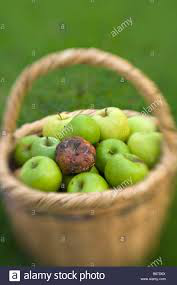

In [115]:
PIL.Image.open(str(da[index]))

In [116]:
start = time.time()
pred=EfficientNetB4_model.predict(image)
end = time.time()

In [117]:
print(end-start)

0.06653237342834473


In [118]:
predictions= EfficientNetB4_model.predict(val_ds)

In [119]:
output_class=classnames[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is DEFECTED
